In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Load

In [144]:
data = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 2. Preprocessing

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [146]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [147]:
data = data.drop_duplicates()

<AxesSubplot:>

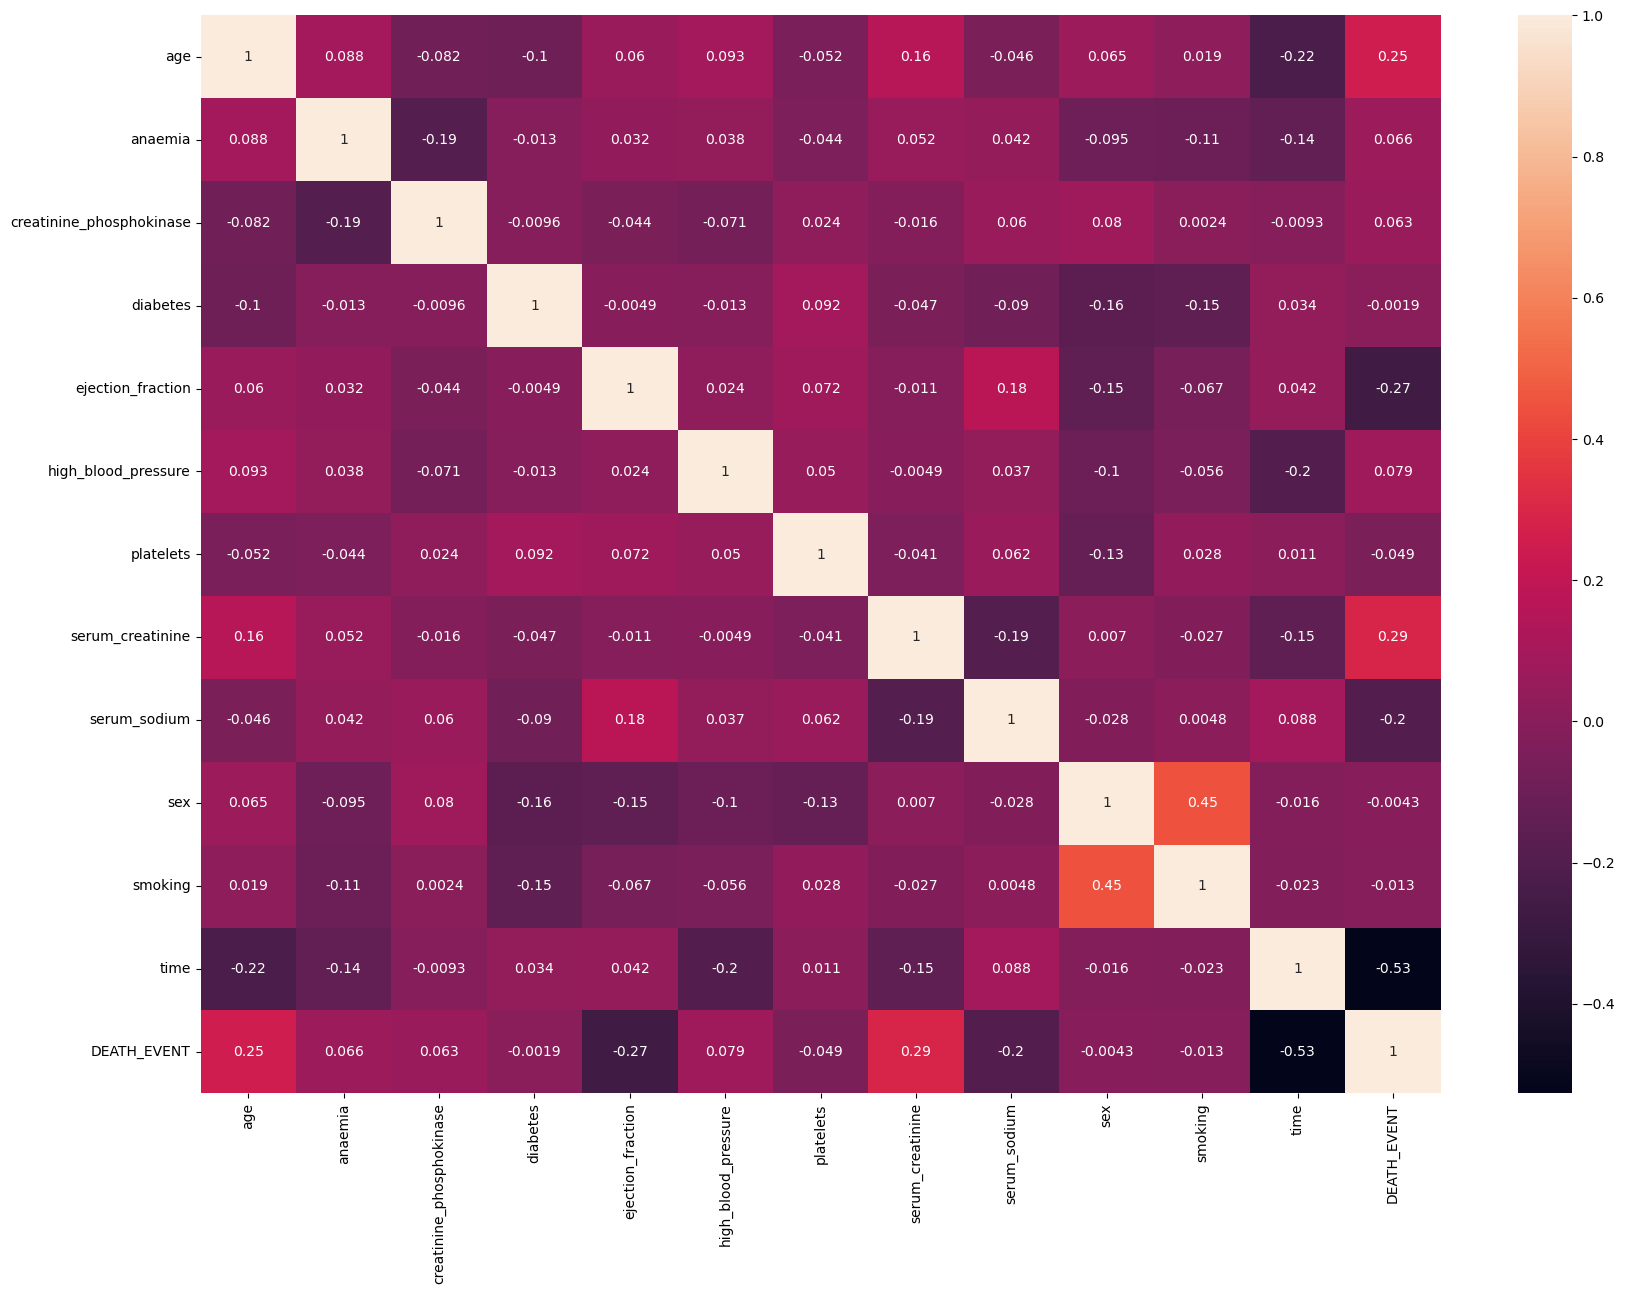

In [148]:
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(),annot=True)

In [149]:
data.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False).style.background_gradient()

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139


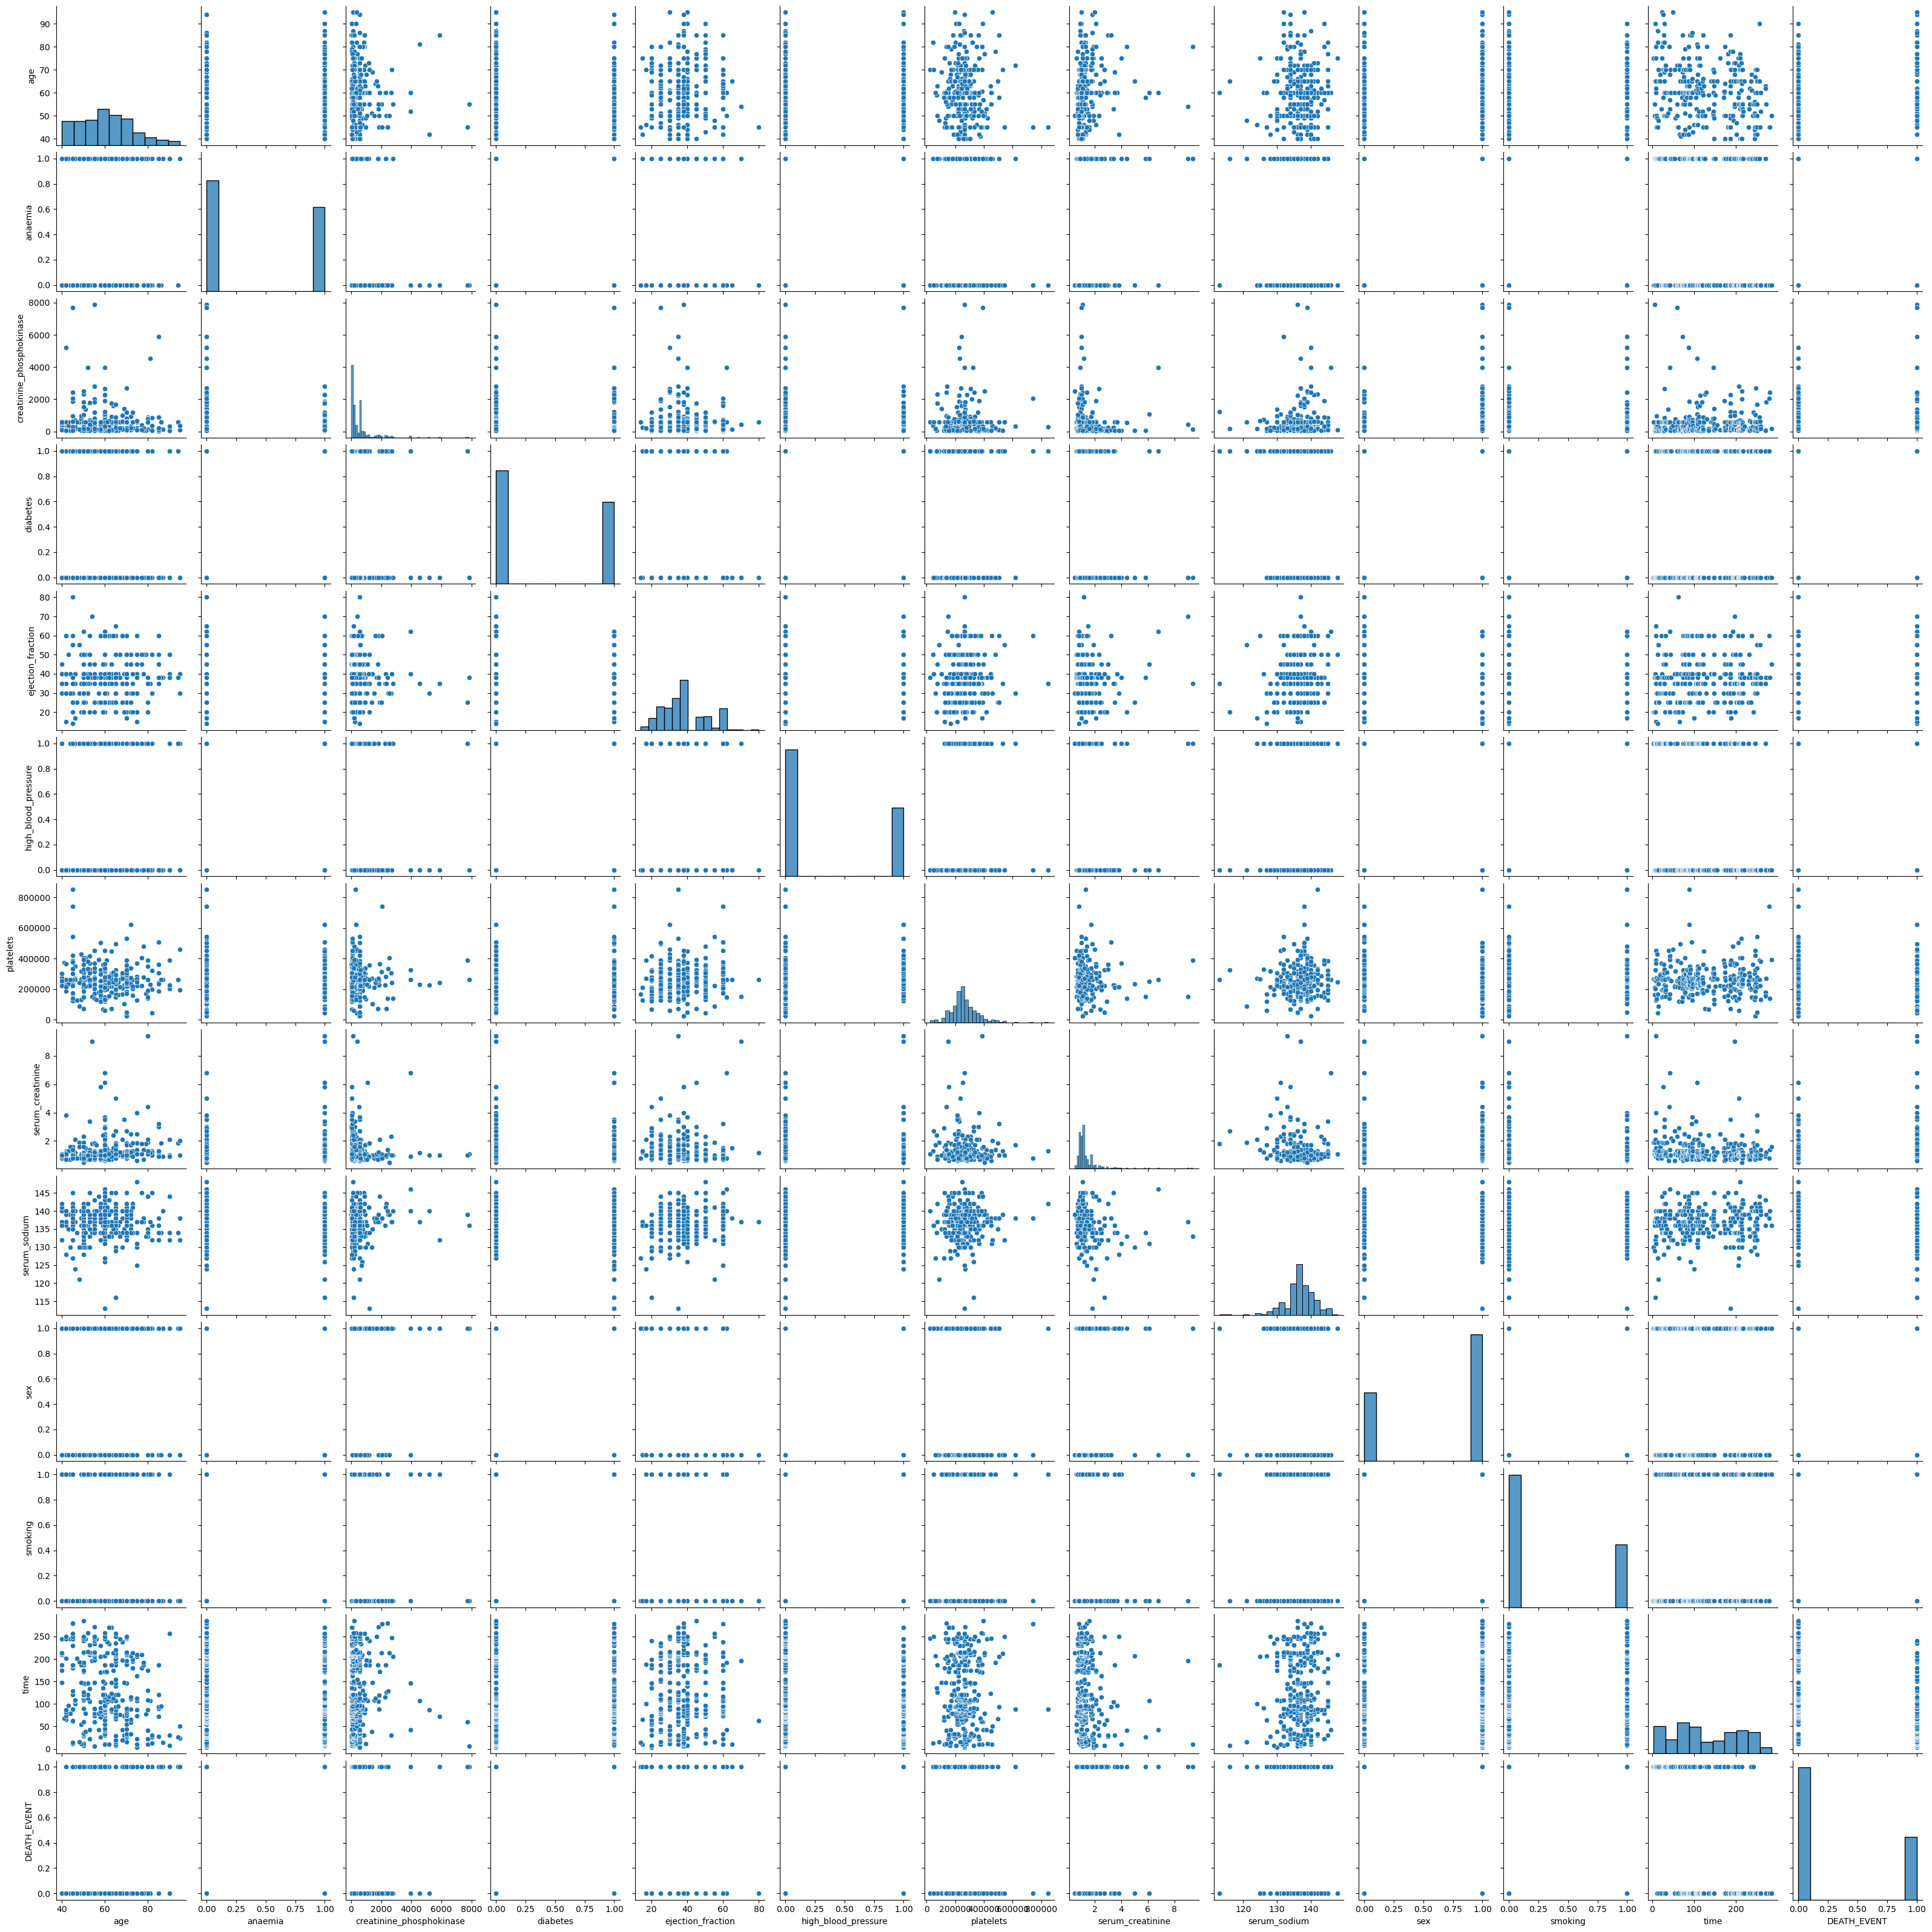

In [150]:
sns.pairplot(data)

<AxesSubplot:xlabel='timeline'>

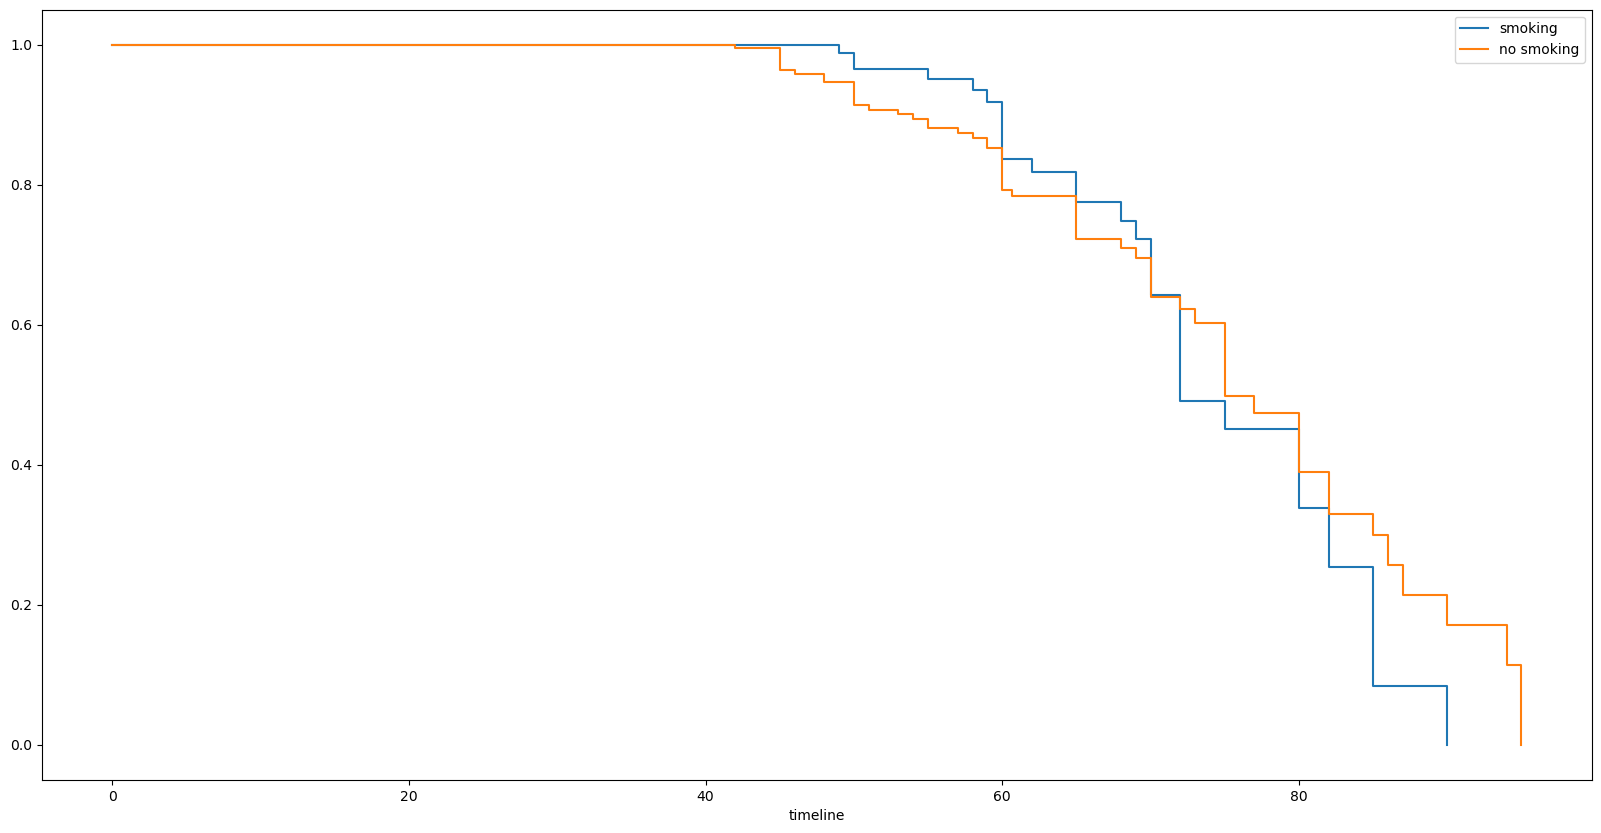

In [151]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
t1 = data[data['smoking']==1]
t2 = data[data['smoking'] == 0]
kmf.fit(durations= t1['age'], event_observed = t1['DEATH_EVENT'], label='smoking')
a1 = kmf.plot(ci_show= False)
kmf.fit(durations= t2['age'], event_observed = t2['DEATH_EVENT'], label='no smoking')
kmf.plot(ci_show= False, ax=a1, figsize= (20,10))

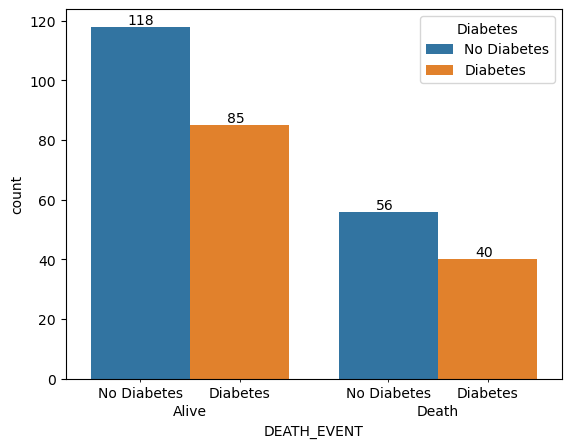

In [152]:
# diabetes
%matplotlib inline
ax = sns.countplot(data=data, x='DEATH_EVENT', hue='diabetes')
ax.legend(['No Diabetes', 'Diabetes'], title='Diabetes')
ax.set_xticks([-.2,.2,.8,1.2], labels=['No Diabetes', 'Diabetes','No Diabetes', 'Diabetes'], minor=True)
ax.set_xticks([0,1], labels=['Alive', 'Death'])
ax.tick_params(axis='x', which='major', direction='inout', length = 30, width= 0)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+.15, p.get_height()+1))
plt.show()

In [153]:
number_cols = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']]

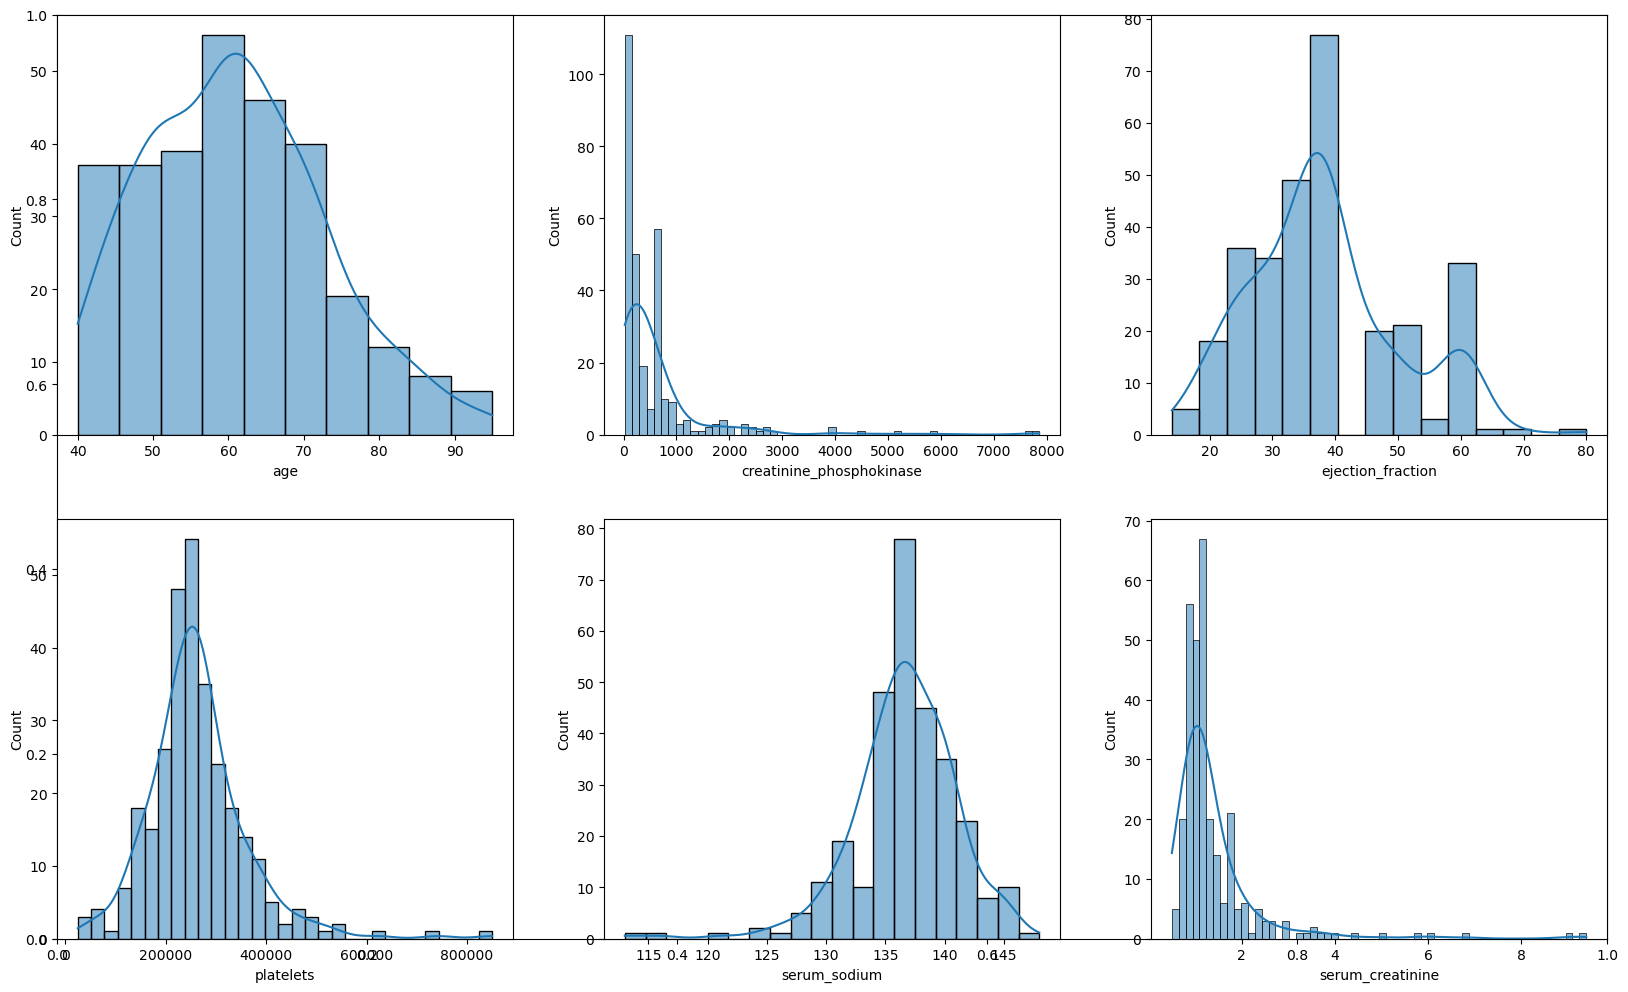

In [154]:
fig, ax = plt.subplots(figsize= (20,12))
for i,col in enumerate(number_cols.columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.histplot(data= number_cols, x=col, ax= ax, kde=True)


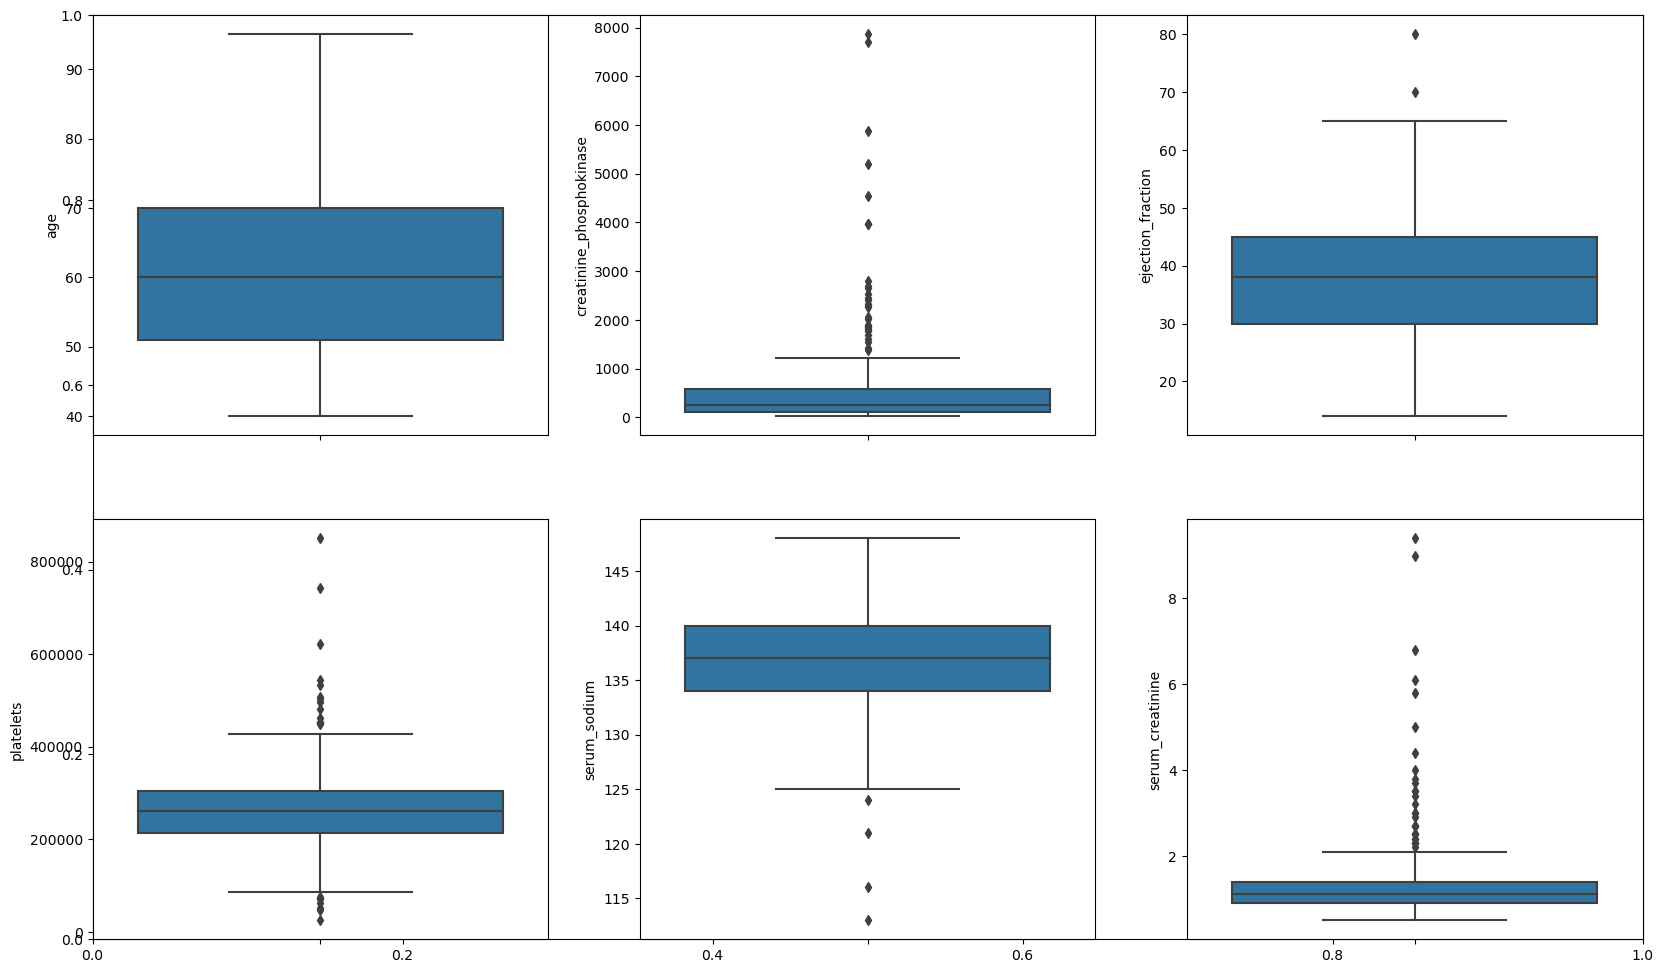

In [155]:
fig, ax = plt.subplots(figsize= (20,12))
for i,col in enumerate(number_cols.columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.boxplot(data= number_cols, y=col, ax= ax)
    

In [156]:
#IQR
def remove_outliers(dataframe):
    col_list = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']
    for col in col_list:
        q25= dataframe[col].quantile(0.25)
        q75= dataframe[col].quantile(0.75)
        IQR = q75-q25
        lower = q25-1.5*IQR
        upper = q75+1.5*IQR
        dataframe = dataframe[((dataframe[col]>=lower) & (dataframe[col]<=upper))]
    return dataframe
df = remove_outliers(dataframe= data)

        
    

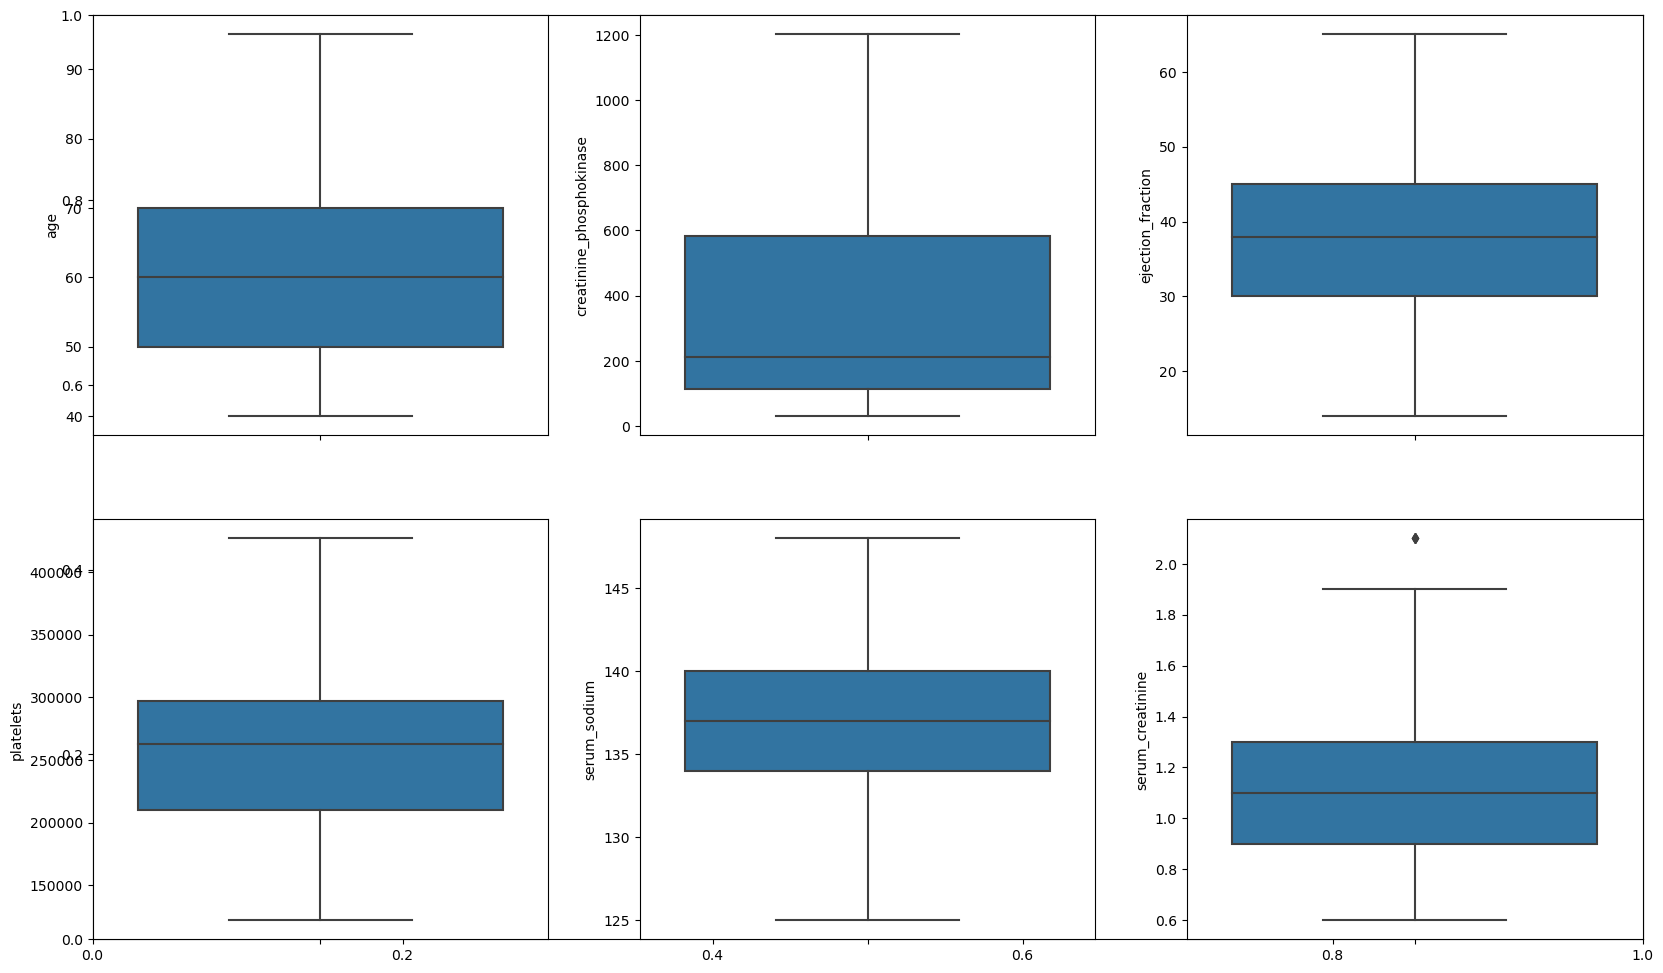

In [157]:
fig, ax = plt.subplots(figsize= (20,12))
for i,col in enumerate(number_cols.columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.boxplot(data= df, y=col, ax= ax)
    

In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.iloc[:,:-1]
X = sc.fit_transform(X)
y = df.iloc[:,-1]


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1)

# 3. Create Model

In [160]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train, y_train)

ExtraTreesClassifier()

# 4. Evaluation

In [161]:
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score
y_pred = extra_clf.predict(X_test)
acc_score = accuracy_score(y_true=y_test, y_pred= y_pred)
print('Accuracy score is: %.2f'%acc_score)

Accuracy score is: 0.84


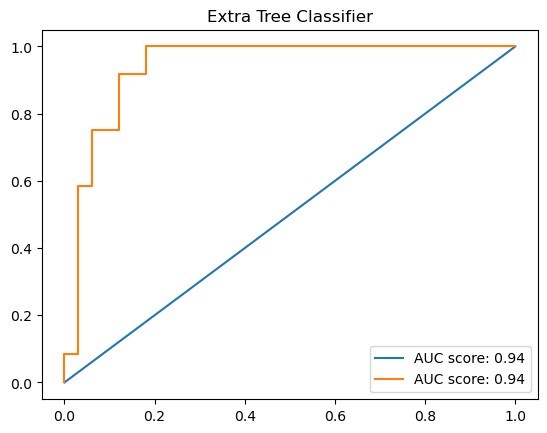

In [162]:
yhat = extra_clf.predict_proba(X_test)
prob = yhat[:,1]
fpr, tpr, _ = roc_curve(y_test, prob)
auc_score = auc(fpr, tpr)
plt.plot([0,1],[0,1],fpr, tpr, label='AUC score: %.2f'%auc_score)
plt.title('Extra Tree Classifier')
plt.legend()

# 5. Tune the model

In [163]:
df.DEATH_EVENT.value_counts()

0    163
1     61
Name: DEATH_EVENT, dtype: int64

In [164]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, stratify=y_smote, random_state=1, train_size=.8)
extra_clf.fit(X_smote_train, y_smote_train)
accuracy_score(y_smote_test,extra_clf.predict(X_smote_test))

0.8484848484848485

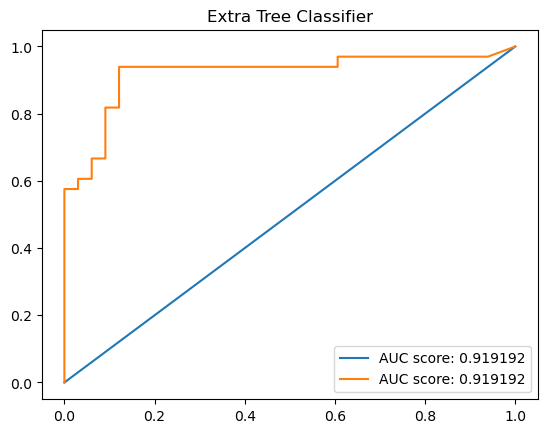

In [165]:
yhat = extra_clf.predict_proba(X_smote_test)
prob = yhat[:,1]
fpr, tpr, _ = roc_curve(y_smote_test, prob)
auc_score = auc(fpr, tpr)
plt.plot([0,1],[0,1],fpr, tpr, label='AUC score: %.6f'%auc_score)
plt.title('Extra Tree Classifier')
plt.legend()

In [166]:
# Tham so mac dinh- dieu chinh tham so
# Dung Cross-Validate - tang hieu qua


In [172]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=10)
clf = ExtraTreesClassifier()
param_grid = {'criterion':['gini','entropy'],
             'n_estimators':[10,20,30,40,50,60,70,80,90,100,110]}
gs = GridSearchCV(estimator=clf,cv = cv, param_grid= param_grid, scoring='roc_auc')
gs.fit(X_smote_train, y_smote_train)
print(gs.best_params_)

{'criterion': 'gini', 'n_estimators': 60}


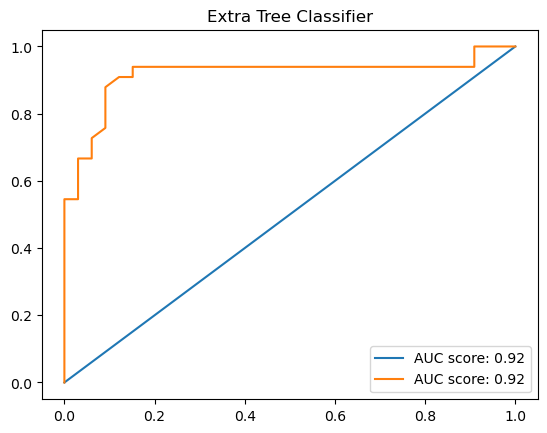

In [173]:
yhat = gs.predict_proba(X_smote_test)
prob = yhat[:,1]
fpr, tpr, _ = roc_curve(y_smote_test, prob)
auc_score = auc(fpr, tpr)
plt.plot([0,1],[0,1],fpr, tpr, label='AUC score: %.2f'%auc_score)
plt.title('Extra Tree Classifier')
plt.legend()